In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.io import imread, imshow
import cv2

%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from collections import defaultdict

import warnings
warnings.filterwarnings("ignore")

from subprocess import check_output
import glob

import PIL
from PIL import Image

In [2]:
def equalize(f):
    h = np.histogram(f, bins=np.arange(257))[0]
    H = np.cumsum(h) / float(np.sum(h))
    e = np.floor(H[f.flatten().astype("int")]*256.)
    return e.reshape(f.shape)

In [4]:
#Setting each path to the folders for each type of cervix
basepath = "/Users/keerat/dev/AOSResearch/resources/Train/"
path_type1 = "/Users/keerat/dev/AOSResearch/resources/Train/Type_1"
path_type2 = "/Users/keerat/dev/AOSResearch/resources/Train/Type_2"
path_type3 = "/Users/keerat/dev/AOSResearch/resources/Train/Type_3"
paths = [path_type1, path_type2, path_type3]

#glob will sort through each folder(Type 1, 2, 3) and return the information in it as a list
type1_cervix_images = glob.glob("/Users/keerat/dev/AOSResearch/resources/Train/Type_1/*.jpg")
type2_cervix_images = glob.glob("/Users/keerat/dev/AOSResearch/resources/Train/Type_2/*.jpg")
type3_cervix_images = glob.glob("/Users/keerat/dev/AOSResearch/resources/Train/Type_3/*.jpg")

#all_cervix_images holds all the data
all_cervix_images = type1_cervix_images + type2_cervix_images + type3_cervix_images

#checking the number of each cervix type
print("The number of Type 1 cervices is {}.".format((len(type1_cervix_images))))
print("The number of Type 2 cervices is {}.".format((len(type2_cervix_images))))
print("The number of Type 3 cervices is {}.".format((len(type3_cervix_images))))
print("The total number of all cervices is {}.".format((len(all_cervix_images))))

#The data has been transported inton a dataframe
all_cervix_images = pd.DataFrame({'imagepath': all_cervix_images})
all_cervix_images['filetype'] = all_cervix_images.apply(lambda row: row.imagepath.split(".")[-1], axis=1)
all_cervix_images['type'] = all_cervix_images.apply(lambda row: row.imagepath.split("/")[-2], axis=1)
all_cervix_images.head()

The number of Type 1 cervices is 236.
The number of Type 2 cervices is 556.
The number of Type 3 cervices is 27.
The total number of all cervices is 819.


,imagepath,filetype,type
0,/Users/keerat/dev/AOSResearch/resources/Train/...,jpg,Type_1
1,/Users/keerat/dev/AOSResearch/resources/Train/...,jpg,Type_1
2,/Users/keerat/dev/AOSResearch/resources/Train/...,jpg,Type_1
3,/Users/keerat/dev/AOSResearch/resources/Train/...,jpg,Type_1
4,/Users/keerat/dev/AOSResearch/resources/Train/...,jpg,Type_1


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ..., 
       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[1, 1, 1],
        [0, 0, 0],
        [1, 1, 1],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[1, 1, 1],
        [0, 0, 0],
        [0, 0, 0],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

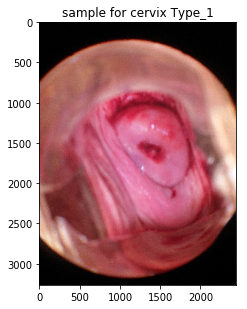

In [5]:
#Using a sample image, I am testing the method found at 
#https://www.researchgate.net/publication/281118372_NumPy_SciPy_Recipes_for_Image_Processing_Intensity_Normalization_and_Histogram_Equalization
#for histogram equalizations
fig = plt.figure(figsize=(12,8))

i = 1
t = all_cervix_images['type'].unique()[0]
ax = fig.add_subplot(1,3,i)
f = all_cervix_images[all_cervix_images['type'] == t]['imagepath'].values[0]
plt.imshow(plt.imread(f))
plt.title('sample for cervix {}'.format(t))
plt.imread(f)

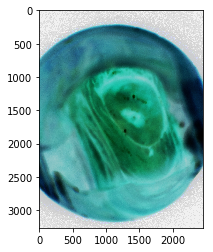

In [6]:
plt.imshow(equalize(plt.imread(f))) #The method works, which means I can implement it into my main CervixImages.ipynb

In [7]:
print(all_cervix_images['type'].unique())

['Type_1' 'Type_2' 'Type_3']


Type_1
Type_2
Type_3


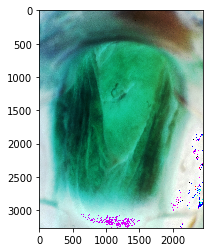

In [8]:
for t in all_cervix_images['type'].unique():
    f = all_cervix_images[all_cervix_images['type'] == t]['imagepath'].values[0]
    print(t)
    f = equalize(plt.imread(f))
    plt.imshow(f)